In [1]:
# Import the libraries
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
import string
import nltk
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)
from sklearn.feature_extraction.text import TfidfVectorizer

%matplotlib inline

Given below is a user-defined function to remove unwanted text patterns from the tweets. It takes two arguments, one is the original string of text and the other is the pattern of text that we want to remove from the string. The function returns the same input string but without the given pattern. We will use this function to remove the pattern ‘@user’ from all the tweets in our data.

In [2]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt

In [3]:
presidential_account_apc = pd.read_csv('/Users/Desktop/Senti Project/2015/mbuhari.csv')
apc_keyword = pd.read_csv('/Users/Desktop/Senti Project/2015/apcc.csv')
pdp_keyword = pd.read_csv('/Users/Desktop/Senti Project/2015/pdp.csv')
buhari_keyword = pd.read_csv('/Users/Desktop/Senti Project/2015/buhari.csv')
jonathan_keyword = pd.read_csv('/Users//Desktop/Senti Project/2015/jonathan.csv')

In [4]:
apc = apc_keyword.append(presidential_account_apc, ignore_index=True)

In [5]:
apc.head()

,id,created_at,original_text,screen_name,author_id,replies,retweet_count,to,hashtags,user_mentions,urls
0,581968997790408704,Sat Mar 28 23:59:56 +0000 2015,"Reps: PDP 108, APC 530, labour party 1, invalid 4",kasym24,378659817,0,0,NaN,NaN,NaN,NaN
1,581968994082643968,Sat Mar 28 23:59:55 +0000 2015,Presidential result finally done with in my PU...,BusyBrain1,69619872,0,9,NaN,NaN,@Omojuwa @DeleMomodu,NaN
2,581968989993201664,Sat Mar 28 23:59:54 +0000 2015,jist me about APC and pdp,AganranO,3113687521,0,0,NaN,NaN,NaN,NaN
3,581968976210710528,Sat Mar 28 23:59:51 +0000 2015,@LANREWAJU_ I actually didn't vote but I went ...,oluRehmy,225106435,0,2,LANREWAJU_,NaN,@LANREWAJU_,NaN
4,581968974411382784,Sat Mar 28 23:59:50 +0000 2015,"RT @abubakar47i The PU at Layin Kuka, U/Dosa: ...",Nubian_Semm,87635886,0,0,NaN,#SitRoom15,@abubakar47i @DOlusegun,NaN


In [6]:
apc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30272 entries, 0 to 30271
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             30272 non-null  object
 1   created_at     30272 non-null  object
 2   original_text  30272 non-null  object
 3   screen_name    30272 non-null  object
 4   author_id      30272 non-null  object
 5   replies        30272 non-null  object
 6   retweet_count  30272 non-null  object
 7   to             3144 non-null   object
 8   hashtags       9787 non-null   object
 9   user_mentions  12370 non-null  object
 10  urls           6532 non-null   object
dtypes: object(11)
memory usage: 2.5+ MB


In [7]:
apc1 = apc.append(buhari_keyword, ignore_index=True)

In [8]:
apc1.head()

,id,created_at,original_text,screen_name,author_id,replies,retweet_count,to,hashtags,user_mentions,urls
0,581968997790408704,Sat Mar 28 23:59:56 +0000 2015,"Reps: PDP 108, APC 530, labour party 1, invalid 4",kasym24,378659817,0,0,NaN,NaN,NaN,NaN
1,581968994082643968,Sat Mar 28 23:59:55 +0000 2015,Presidential result finally done with in my PU...,BusyBrain1,69619872,0,9,NaN,NaN,@Omojuwa @DeleMomodu,NaN
2,581968989993201664,Sat Mar 28 23:59:54 +0000 2015,jist me about APC and pdp,AganranO,3113687521,0,0,NaN,NaN,NaN,NaN
3,581968976210710528,Sat Mar 28 23:59:51 +0000 2015,@LANREWAJU_ I actually didn't vote but I went ...,oluRehmy,225106435,0,2,LANREWAJU_,NaN,@LANREWAJU_,NaN
4,581968974411382784,Sat Mar 28 23:59:50 +0000 2015,"RT @abubakar47i The PU at Layin Kuka, U/Dosa: ...",Nubian_Semm,87635886,0,0,NaN,#SitRoom15,@abubakar47i @DOlusegun,NaN


In [9]:
apc1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40277 entries, 0 to 40276
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             40277 non-null  object
 1   created_at     40277 non-null  object
 2   original_text  40277 non-null  object
 3   screen_name    40277 non-null  object
 4   author_id      40277 non-null  object
 5   replies        40277 non-null  object
 6   retweet_count  40277 non-null  object
 7   to             4242 non-null   object
 8   hashtags       11986 non-null  object
 9   user_mentions  15877 non-null  object
 10  urls           10095 non-null  object
dtypes: object(11)
memory usage: 3.4+ MB


In [10]:
apc1['party'] = 'APC' 

In [11]:
apc1.head()

,id,created_at,original_text,screen_name,author_id,replies,retweet_count,to,hashtags,user_mentions,urls,party
0,581968997790408704,Sat Mar 28 23:59:56 +0000 2015,"Reps: PDP 108, APC 530, labour party 1, invalid 4",kasym24,378659817,0,0,NaN,NaN,NaN,NaN,APC
1,581968994082643968,Sat Mar 28 23:59:55 +0000 2015,Presidential result finally done with in my PU...,BusyBrain1,69619872,0,9,NaN,NaN,@Omojuwa @DeleMomodu,NaN,APC
2,581968989993201664,Sat Mar 28 23:59:54 +0000 2015,jist me about APC and pdp,AganranO,3113687521,0,0,NaN,NaN,NaN,NaN,APC
3,581968976210710528,Sat Mar 28 23:59:51 +0000 2015,@LANREWAJU_ I actually didn't vote but I went ...,oluRehmy,225106435,0,2,LANREWAJU_,NaN,@LANREWAJU_,NaN,APC
4,581968974411382784,Sat Mar 28 23:59:50 +0000 2015,"RT @abubakar47i The PU at Layin Kuka, U/Dosa: ...",Nubian_Semm,87635886,0,0,NaN,#SitRoom15,@abubakar47i @DOlusegun,NaN,APC


In [12]:
apc1.columns

Index(['id', 'created_at', 'original_text', 'screen_name', 'author_id',
       'replies', 'retweet_count', 'to', 'hashtags', 'user_mentions', 'urls',
       'party'],
      dtype='object')

In [13]:
apc = apc1.drop(['id', 'created_at', 'screen_name', 'author_id', 'replies', 'retweet_count', 
           'to', 'hashtags', 'user_mentions', 'urls'], axis = 1) 
  

In [14]:
#Create a function to clean the tweets
def cleanTxt(text):
 text = re.sub('@[A-Za-z0–9]+', '', text) #Removing @mentions
 text = re.sub('#', '', text) # Removing '#' hash tag
 text = re.sub('RT[\s]+', '', text) # Removing RT
 text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
 
 return text


# Clean the tweets
apc['tidy_tweet'] = apc['original_text'].apply(cleanTxt)

# Show the cleaned tweets
apc.head()

,original_text,party,tidy_tweet
0,"Reps: PDP 108, APC 530, labour party 1, invalid 4",APC,"Reps: PDP 108, APC 530, labour party 1, invalid 4"
1,Presidential result finally done with in my PU...,APC,Presidential result finally done with in my PU...
2,jist me about APC and pdp,APC,jist me about APC and pdp
3,@LANREWAJU_ I actually didn't vote but I went ...,APC,_ I actually didn't vote but I went around in ...
4,"RT @abubakar47i The PU at Layin Kuka, U/Dosa: ...",APC,"47i The PU at Layin Kuka, U/Dosa: Presidential..."


I want to add the tweets’ subjectivity and polarity to the DataFrame. In order to do this, I’ll create two functions: one to get the tweets called Subjectivity (how subjective or opinionated the text is — a score of 0 is fact, and a score of +1 is very much an opinion) and the other to get the tweets called Polarity (how positive or negative the text is, — score of -1 is the highest negative score, and a score of +1 is the highest positive score). Next I’ll store the results into two columns — one called Subjectivity and the other called Polarity — and show the results.

In [15]:
# Create a function to get the subjectivity
def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
   return  TextBlob(text).sentiment.polarity


# Create two new columns 'Subjectivity' & 'Polarity'
apc['Subjectivity'] = apc['tidy_tweet'].apply(getSubjectivity)
apc['Polarity'] = apc['tidy_tweet'].apply(getPolarity)

# Show the new dataframe with columns 'Subjectivity' & 'Polarity'
apc.head()

,original_text,party,tidy_tweet,Subjectivity,Polarity
0,"Reps: PDP 108, APC 530, labour party 1, invalid 4",APC,"Reps: PDP 108, APC 530, labour party 1, invalid 4",0.0,0.00
1,Presidential result finally done with in my PU...,APC,Presidential result finally done with in my PU...,1.0,0.00
2,jist me about APC and pdp,APC,jist me about APC and pdp,0.0,0.00
3,@LANREWAJU_ I actually didn't vote but I went ...,APC,_ I actually didn't vote but I went around in ...,0.5,0.05
4,"RT @abubakar47i The PU at Layin Kuka, U/Dosa: ...",APC,"47i The PU at Layin Kuka, U/Dosa: Presidential...",0.0,0.00


In [16]:
# Create a function to compute negative (-1), neutral (0) and positive (+1) analysis
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'


apc['sentiment'] = apc['Polarity'].apply(getAnalysis)
# Show the dataframe
apc.head(10)

,original_text,party,tidy_tweet,Subjectivity,Polarity,sentiment
0,"Reps: PDP 108, APC 530, labour party 1, invalid 4",APC,"Reps: PDP 108, APC 530, labour party 1, invalid 4",0.0,0.00,Neutral
1,Presidential result finally done with in my PU...,APC,Presidential result finally done with in my PU...,1.0,0.00,Neutral
2,jist me about APC and pdp,APC,jist me about APC and pdp,0.0,0.00,Neutral
3,@LANREWAJU_ I actually didn't vote but I went ...,APC,_ I actually didn't vote but I went around in ...,0.5,0.05,Positive
4,"RT @abubakar47i The PU at Layin Kuka, U/Dosa: ...",APC,"47i The PU at Layin Kuka, U/Dosa: Presidential...",0.0,0.00,Neutral
5,[DailyPost] Nigeria Decides: APC floors PDP in...,APC,[DailyPost] Nigeria Decides: APC floors PDP in...,0.0,0.00,Neutral
6,apç #VoteFifthHarmony #KCA,APC,apç VoteFifthHarmony KCA,0.0,0.00,Neutral
7,apç #VoteFifthHarmony #KCA,APC,apç VoteFifthHarmony KCA,0.0,0.00,Neutral
8,"Dont be stupid,mimiko won his PU and no ward w...",APC,"Dont be stupid,mimiko won his PU and no ward w...",0.0,0.00,Neutral
9,"""@Latchenko: Polling Unit Ward 016 faskari LG ...",APC,""": Polling Unit Ward 016 faskari LG katsina st...",0.0,0.00,Neutral


In [17]:
dict = {'Neutral' : 0, 'Positive' : 1, 'Negative' : -1}

In [18]:
# Remap the values of the dataframe 
apc['sent']= apc['sentiment'].map(dict) 

In [19]:
apc.head()

,original_text,party,tidy_tweet,Subjectivity,Polarity,sentiment,sent
0,"Reps: PDP 108, APC 530, labour party 1, invalid 4",APC,"Reps: PDP 108, APC 530, labour party 1, invalid 4",0.0,0.00,Neutral,0
1,Presidential result finally done with in my PU...,APC,Presidential result finally done with in my PU...,1.0,0.00,Neutral,0
2,jist me about APC and pdp,APC,jist me about APC and pdp,0.0,0.00,Neutral,0
3,@LANREWAJU_ I actually didn't vote but I went ...,APC,_ I actually didn't vote but I went around in ...,0.5,0.05,Positive,1
4,"RT @abubakar47i The PU at Layin Kuka, U/Dosa: ...",APC,"47i The PU at Layin Kuka, U/Dosa: Presidential...",0.0,0.00,Neutral,0


In [20]:
apc.to_csv('apc2015.csv', encoding='utf-8')

In [21]:
del dict

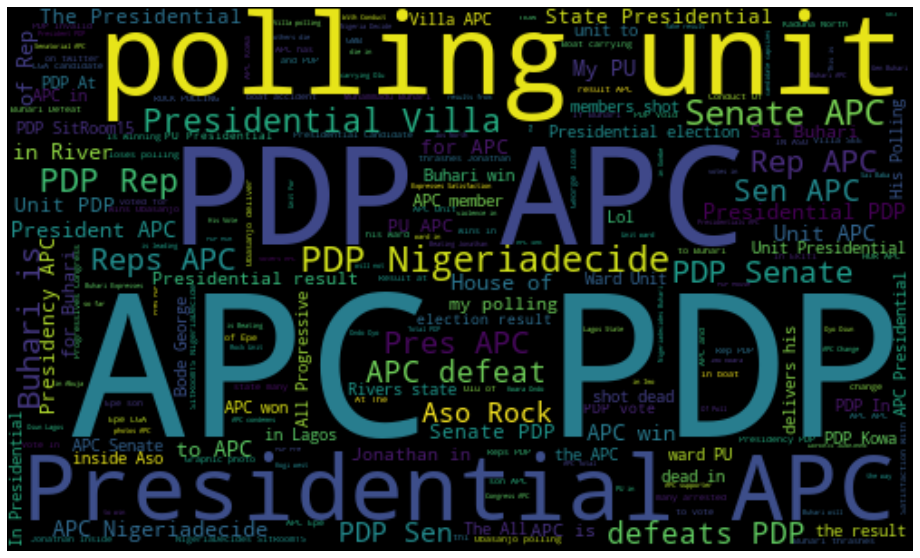

In [22]:
# word cloud visualization
allWords = ' '.join([twts for twts in apc['tidy_tweet']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)
plt.figure(figsize=(15, 10))

plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [23]:
# Printing positive tweets 
print('Printing positive tweets:\n')
j=1
sortedDF = apc.sort_values(by=['Polarity']) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['sentiment'][i] == 'Positive'):
    print(str(j) + ') '+ sortedDF['tidy_tweet'][i])
    print()
    j= j+1

Printing positive tweets:

1) _ I actually didn't vote but I went around in the evening just to know what's up. I was surprised. APC won just 2 streets in orile

2) Na'ibawa Primary School, Kano city- APC scored 2493, PDP 41.

3) So far so good it's been APC winning..personal research and news around the country but we hear PDP votes use to... 

4) IN CAPS LOCK ! HAHA ! ?“__Seun: Bolari PU, Gombe State. PRES.: APC- 336, PDP - 0. - Olu Adegoke WatchNg2015 ”"

5) “_: I Am 💯✔️ Sure That Patience Voted For APC Because Of Her High Level Of Illiteracy 👌”😄

6) Credible intelligence from Enugu collation center.. APC agents have been chased away by soldiers &amp; results are now being change SitRoom15

7) Concrete vibrations Kanye x APC Airport Sweater JohnElliottCo Curve Tee CheapmMonday Waxed… 

8) APC wins in Sambo’s ward: The All Progressives Congress has won the…  inspiredreporters

9) It's fairly obvious many of the GEJites on twitter were hired. Or else, how come it's APC people that hav

560) "_bros: They dropped N100,000 per PU in ma hood, to win at least 100 votes in each PU ... People collected &amp;amp; still voted APC"Nice

561) APC wins Obasanjo’s polling unit 2 hours ago The All Progressives Congress won the polling unit of former... 

562) PU 008 Abule AKa,okoko,OjoLga Pres.pdp 218 APC 100 rep pdp212 Apc 95 senate pdp 212 Apc 100. PDP wins in my booth.

563) OREDO LG in Benin City GEJ is winning wide margin wipe out APC. Agege lagos same GEJ is winning 😀😀😀✌️✌️✌️✌️✌️👍👍👍👍

564) Yoh homies, who is winning Apc or Pdp? We dey pray for una.

565) HAHAHA“: When APC is sharing rice but you need PDP’s oil so you can make the fried rice. 

566) That funny moment today, this APC supportr singing to his PDP friend "Wa fe ku lale e. A te soju e lale e" I couldnt laff. Won ku te soju e

567) AMAZING STORIES AROUND THE WORLD: APC Chairmanship Aspirant, Others Die In Boat Acci... 

568) Hmmmm"1: My major concern right now is: The reaction of the Northerners if PDP wins &amp; T

987) A made up mind will not face Mark's soldiers,tbh.": Nothing is as strong as a made up mind :  I hope APC has "

988) We all knew Jonathan will clear the East. APC knew right from day one. So why insult them.

989) Doubting thomas'es Ondo na PDP state abi so APC can't win shey? LOL Una go wise very very soon.

990) ": APC wins Senate election in Presidential Villa polling units NigeriansElect2015 

991) Lmao, see dem, they have started defecting to APC o...those PDP bloggers,....where are the brooms I kept here?!

992) Chei“_habib:: Lmao:U better vote buhari n get good education _rookie: WHYDOES APC SUPPORTERS GET MOUTH ODOUR?”

993) 1023FM APC members shot dead in Rivers state, many arrested 

994)  1 Benin is bending towards PDP, but APC will get 25% of actual vote cast, which is good, rember dis is a SS state

995) “14: Looool... APC wins on social media PDP wins in reality... Focus until Jega speaks”just a twit for the sake of twitting or ?

996) APC Members Shot Dead In Rivers


1560) shoro niyen? ": APC people dis is for you lol": BREAKING ""

1561) O.o no boss "_AA: APC leading only on twitter 😺"

1562) Graphic Photos: APC embers Shot Dead In Rivers State, Many Arrested&gt;&gt;&gt;

1563) How many people kon dey naija abeg “@_khay_O: Onitsha east PU 025- total voters: 16754. APC: 3. PDP: 16750. KOWA: 1.”

1564) Just finished counting at my Polling unit Presidential APC 190 PDP 78 long live our great country Nigeria.

1565) Graphic Photos: APC embers Shot Dead In Rivers State, Many Arrested&gt;&gt;&gt;

1566) ": PU16 EDOHAHO-AHOADA EAST RIVERS [PDP-200, APC-10] Nigeriadecides" Very accurate result. This I know. NoViolence

1567) 😀😀😀 ": Tv says PDP is winning, Twitter says APC has won, I haven't Listened to the Radio mayb they will say KOWA is leading"

1568)    David Mark lost where? The PUs dat APC won have margins of 8-10 voters. I'll give u examples dat am sure

1569) ": The guy is right here , Sums up many Twitter stories “: Breaking: APC wins Bayelsa lo

2017) "_miemie: ": Gov Babangida Aliyu Lost Senate. Thats what i'm talking about. APC Sak!!"are yhu sure"kut! Is dat true!?

2018) Graphic photos: APC members shot dead in Rivers state, many arrested  • Kindly Follow 

2019) APC wins Obasanjo’s polling unit 

2020)   See as APC dey lead for Kogi. Change don come finish be that o. LOL

2021) Take am easy! ": Nepa Bustop Jakande Estate Isolo NigeriaDecides PDP - 87 APC - 400 Kowa - 2""

2022) Has nothing to do with tribeMyOpiniontho“: Lol oh puhlease. Would Yoruba people have voted for APC if osinbanjo wasn't there?

2023) “: Makarfi ward did PDP below and APC above. Interesting.” He knows his onions

2024) Lol": APC has to win... God will do it"

2025) NigeriaDecides: APC wins Obasanjo's unit: Presidential: APC-100, PDP-16; 

2026) ": F.C.T minister Bala muhammad polling unit APC-326 while PDP 96" LOL! iVotedGMB NigeriaDecides SitRoom15

2027) APC wins Obasanjo’s polling unit 

2028) Dis is stale"_: Yesss ": Just watched a video, buhari

2519) Attention : kindly inform APC people in Iloro Ekiti that INEC officials are presently at Wuraola Hotel Collating fake results 

2520) Jonathan loosing on His home soil to APC live from ASO ROCK

2521) Entertainment. Graphic photos: APC members shot dead in Rivers state, many arrested: I just rece...  pls retweet

2522) ": The elections are looking good and free; results pouring in from all over the country. Seems APC is on top..." hell yah!

2523) Graphic photos: APC members shot dead in Rivers state, many arrested 

2524) “_sambo: Apc whipping pdp ”whip dem more

2525) APC wins in Sambo’s ward NigeriansElect2015   

2526) ": My sincere thanks to the voters of my polling unit, who voted overwhelmingly for APC. Change"

2527) Assuming APC wins Presidential elections, can we please keep the current Minister for Agriculture? Arguable GEJ's best performing minister."

2528)  APC are experienced, they know not to sleep.

2529) In Lagos APC leads PDP by a margin greater than 10% in all

2892) Oh NO! APC Defeats PDP In Presidential Villa, See confirmed Result at 

2893) "77: Kowa Baturen Zabe ne anan LoL. Jega na your announcement go be the Legit one. NigeriaDecides" APC kawai!!!

2894) I really hope APC delivers on this change they keep talkin abt. They shouldn't let Nigerians regret voting them into office. Nigeriadecides

2895) 2015 General Election Result in Ega Ward, Idah,Kogi state. PRESIDENTIAL APC:1,806 PDP:563 SENAT APC:1,700 PDP:678 HOR APC:1,651 PDP:655

2896) Oh NO! APC Defeats PDP In Presidential Villa, See confirmed Result at 

2897) I am happy with the results we are getting from kogi and Benue state. APC all the way. ihavedecided

2898) Oh NO! APC Defeats PDP In Presidential Villa, See confirmed Result at 

2899) NigeriaDecides first result from Daura HouseOfReps APC 500 PDP 1 APGA 1 (mix up earlier. House not Senate pls) 

2900) ": In Lagos APC leads PDP by a margin greater than 10% in all but 3 LGAs: Amuwo Odofin, Oshodi Isolo and Ajeromi Ifelodin"

2

3341) Sen Lado (PDP Kano Central) lost in his own ballot box PU/025: Presidency: APC 187 - PDP 9 Reps: APC 174 - PDP 17 Sen: APC 161 - PDP 32

3342)  R/s wit violence ehn.. dey'll b takn tins too personal. APC members shot dead in Rivers state, many arrested 

3343) APC wins Obasanjo’s polling unit: The All Progressives Congress won the polling unit of… 

3344) LOL":  thrashes Jonathan inside Aso Rock: Unit 22: PDP 302,APC 348 Unit 21: PDP 293,APC 265 Total: PDP 595,APC 613

3345) I tink D Apc in Ondo wud his about win it. I tink D APC edu win by 52 or mor %.

3346)  1 kogi is good. APC won over 60% of the vote.

3347) Really ": Results frm  's PU. Ajikobi Ward, PU 005 SEN: APC=301, PDP=58,PRES: APC=321, PDP=46, REP: APC=307, PDP=50.

3348) PDP guys tweeting /Retweeting PDP wins, APC guys doing same!

3349) Any PDP vote more than 419 is rigging ": I won't be surprised if the final elections read APC : 39965325679953356790063 PDP: 491"""

3350) ": For those of you still active on Facebo

3730) *in Skuki's voice* Nairabet don pay : Yes ooo ... With the twitter result.. APC winning as predicted : Are u

3731) Seems APC's winning on social media...wnt be surprised if PDP's anounced as winners on monday. smh...this country needs help.

3732)  loooool... what part of apapa are u talking about? Liverpool, signal barracks or where? Apc swept most parts of apapa sir

3733) Am sure the one person that voted for NCP is the aspirant =)) ": Jos North Turaki 2 PU 003 APC 423 NCP 1 PDP 0"

3734) Interesting. In jigawa state APC 344, PDP 00.     "

3735) ": Bolari PU in Gombe APC - 336 PDP - 0 Nigeriadecides "Not even smart 2 know House of Assembly is 11/4

3736) APC Members Shot Dead In Rivers State, Many Arrested (Photos) 

3737) Paul Owens & APC - Joy In Jesus  nowplaying gospelmusic

3738) Flawless VictoRy Jos North Turaki 2 PU 003 APC 423 NCP 1 PDP 0

3739) Alimosho Lagos State Presidency PDP - 3837 APC - 57,923 NigeiaDecides. See vexing no light for over a year in that area I g

4144) : “: Buhari wins in Abuja Barracks 717 registered voters, APC - 280, PDP - 213 votes. Nigeriadecides” 🙌🙌🙌🙌

4145) : Buhari wins in Abuja Barracks 717 registered voters, APC - 280, PDP - 213 votes. Nigeriadecides

4146) ..APC binu gan ni oOo..say baba lo le se oOo..awon eyan kon te ka fun APC ni oOo..awon APC ti gbagi relay oOo☺♥

4147) _incredible oh well, I dunno. It's just not surprising that APC is getting more votes in the north/west and PDP in the east/south

4148) Election 2012 esque @_kwakutii: Looks like APC is winning on Twitter. Selection bias huh?

4149) ": Buhari wins in Abuja Barracks 717 registered voters, APC - 280, PDP - 213 votes. Nigeriadecides"

4150) Kidney or liver sauce “: I was predicting 30% for APC in Plateau State but sauces are saying it could be as high as 40%. Amazing.”

4151) ": The way APC is steady entering and capturing opponents PU. You'll think they borrowed moves from Drake. NigeriaDecides"lol

4152) Dese peepx aint loyal.. ": I can't believe G

4557) Apparently APC has won. GEJ needs to start arranging. He's taking his leave! Back to Otueke. 

4558) Well so happy PDP WON presidential vote in my area APC 277 PDP 316

4559) I guess the igbo people who voted APC do not believe in following the bandwagon, and surely they dont care about what you think.

4560) We need change, and the party we want is the one going on😂😂😂 inn sha Allah we are happiness more. 🙌🙌🙌 APC alaji

4561) APC wins in Obasanjo's ward in Ogun - Vanguard News  via 

4562) ": Buhari wins in Abuja Barracks 717 registered voters, APC - 280, PDP - 213 votes. Nigeriadecides"

4563) “: : This is the result of the whole of my area, New GRA Bama Road, Maiduguri. Borno State APC 829 PDP 39”SitRoom15

4564) Result So Far. 7) Jigawa...APC(90%) PDP(10%) 8) Yobe..APC(92%) PDP(8%) 10) Borno..APC(90%) PDP(10%)  

4565) Cos the result coming in show clearly that APC is leading both in the north and south/west.

4566)  apc are working that apc is winning in IMO,is it true

4567)

4912) Until the magic happens "_Jaymez: - Lmaoo... So far so good, Apc Clearing Votes ... We stay winning 😜😜😝"

4913) Dino Baba . All The Best . God don do am.."_melaye: Deeper life unit. Kogi west. Senate Pdp 85 Apc 190 Ap 17"

4914) By the looks of this election GMB is going to win it ! GMBAllTheWay APC Change

4915) BEAUTIFUL! “: Presidential Villa: APC defeats PDP 

4916) ": Mogadishu Cantonment Abuja APC 131 PDP 75 Nigeriadecides " the army wants change

4917) “: Buhari wins in Abuja Barracks 717 registered voters, APC - 280, PDP - 213 votes. Nigeriadecides” 🙌🙌🙌🙌

4918) APC is absolutely killing it almost everywhere.

4919) APC wins ex-President Olusegun Obasanjo's polling unit [Unit 2, Ward 11, Shokori, Abeokuta North Local Government... 

4920) Graphic Photos: APC Members Shot Dead In Rivers State, Many Arrested  VIA 

4921) Fani kayode has accept defeat already ,quoting him no matter who wins don't let forget we are all Nigeria whether PDP or APC IvotedGMB

4922) ": APC wins Ob


5290) Sure!": APC method is to give fake results on twitter so they will cry foul when the true result is announced."

5291) Sweet! 😃 ": : My polling unit 024 Anguwar Sarki Ward, Kaduna North: APC 430, PDP 11, APA 1, AD 1, VOID

5292) Rotfl": 😂😂😂 ": I was smiling inside wen I was counting APC's victory, just had 2 keep straight face as per officer""

5293) 2015 General Election Result. Polling Unit-025, Dawaki, Ran Road Bauchi. President APC-356, PDP - 6

5294) The results are trickling in and from what has observed so far, Muhammadu Buhari of the APC is clearly leading Goodluck Jonathan of the PDP

5295) Yh,We Just Want PDP Out _DayDream: Funny enough 80% of Nigerians don't even knw the full meaning of APC

5296) Na those wey don steal money fit contest “: We need more Powerful political parties in Nigeria. This PDP vs APC battle gets boring

5297) As it is rite nw, PDP re nw handing ova d whole post to APC... Should we call it a sign of victory/freedom or a... 

5298) JoetJohnson's 

5639) RT! APC wins in Obasanjo’s ward in Ogun 

5640) RT! APC wins in Obasanjo’s ward in Ogun 

5641) RT! APC wins in Obasanjo’s ward in Ogun 

5642) RT! APC wins in Obasanjo’s ward in Ogun 

5643) ": “: APC won in Barnawa. WOW”also wining in U/sanusi"...same story at sobongari

5644) RT! APC wins in Obasanjo’s ward in Ogun 

5645) RT! APC wins in Obasanjo’s ward in Ogun 

5646) : APC is winning on twitter as usual.

5647) You have always been a joke. ": Breaking: APC wins Bayelsa lol"

5648) Last RT! As if APC overlords are secretly fighting Omojuwa...this public countering they're giving him is embarrassing for his soul! lol

5649) "_Whaley: Finally The results in my ward are in. APC won 208 to PDPs 94 .. GMB!!!" Good result for GEJ. Almost 50%

5650)    From Bauchi APC are leading with more than 80%.

5651) ": APC won in Barnawa. WOW" What? The Barnawa that I know? Voting Buhari? Ah, change is coming.

5652) . At Bode George's ward, PDP loses polling unit to APC. See full details (


6082) APc winning Ajaokuta Local Govt of Kogi state ...... Idgaf who's gat a contrary result

6083)   APC is winning kogi oo

6084) RESULTS: IMG Primary Schl, PU 3, Ward 10, IBADAN S/W L.G. Oyo State. Presidency APC 118 PDP 44 Nigeriadecides

6085) “: This is how PU021 Maitama, Abuja Celebrated APCs victory Presidential APC - 294 PDP - 198 

6086) I'm sure even the 54 votes that GEJ got in Na'ibawa was a mistake by some trying to vote for Lado (senate, pdp) Lol!. APC - 2,559, PDP - 54

6087) lool _Ukeri: APC leading on twitter.. Nice though ☺

6088) ": PRESIDENTIAL : PU, Project Quarters Primary school, Lafia, Nasarawa State APC : 372 PDP: 158"

6089) General Election Result, Polling Unit-021B, Dan Iya Hardo, Sa'adu Zungur, Bauchi State. President APC-252, PDP -5 Nigeria2015

6090) __: lookatew : *Checks pre nude avi* "shelah__: if APC wins... i would twitpic my nudes"

6091) IvotedGMB And d mighty presidential election in my PU here in omilani ward 023: PDP-109 and APC-144!!!!!!!!!!! 

6581) ": Indai Apc suka fadi I promise zanyi askin kwal kwal 😂😂😂"lol yayi

6582) Graphic photos: APC members shot dead in Rivers state, many arrested 

6583)  This is the true result for Ward F, Bogije, Ibeju-Lekki Pres. APC: 385 PDP: 250 Sen. APC: 406 PDP: 236 Reps APC: 386 PDP: 228

6584) Check TL : And now?": At Ramat, still counting _: Pako GRA ogudu Lagos. APC 47 PDP 36 Presidential. I'm sure of this o

6585) _   Anyone who ever thot APC could win Rivers is deluded. It was never about winning. It was about 25%.

6586) The results coming from Abuja... apc is winning at most PU!

6587) ": Tv says PDP is winning, Twitter says APC has won, I haven't Listened to the Radio mayb they will say KOWA is leading"

6588) APC better win by high numbers bcos PDP will release their results soon. . . in millions.

6589) APC wins in Obasanjo’s ward in Ogun on march 28, 2015 at 7:32 pm in elections 2015 , news Obasanjo being... 

6590) APC "28: People fear change, as the known is often more prefera


6889) Olodo are you sure of what you are tweeting?? "_rookie: KOFAR IDI BAUCHI STATE PU: MAJIDADI APC 11 PDP 598 GoodluckWins_"

6890) Perhaps, the people in GANIU ADAMS' polling unit mistook APC for OPC. Lol BUHARI ALL THE WAY!!!

6891)  I can only verify the PDP, APC and KOWA The other party names/nos I no too sure

6892) "__: if APC wins... i would twitpic my nudes"I will be happy to see it

6893) Cc  ": Ifako-Ijaiye, Lagos. PU 24/10/03/001 SENATE PDP: 67 APC: 101 VOID: 3"

6894) “: ": APC winning on Twitter but PDP winning on TV !!" 😂😂😂😂”

6895) _bros uncle jag......how your end nah...so happy APC won my hood

6896) Wrong! It'll win in both ways": One thing we all agree on is that APC will win on twitter and PDP will win in d real world"

6897) Lol! : ": One thing we all agree on is that APC will win on twitter and PDP will win in d real world.. Fine by me.."

6898) GMBwinsSTILL"_oLICE: ((( O_O ))) : APC 286 PDP 9 Happy to delivered it for GMB. Counting on progress 4 all units"

6

7233) If buhari win diz election omo no be Godwin O :)

7234) CONFIRMED!!! GEN. Buhari thrashes Jonathan inside Aso Rock Unit 22: PDP 302, APC 348. Unit 21: PDP 293, APC 265. Total: PDP 595, APC 613.

7235) : Buhari was accredited once!!! Lmao gej tried 4 times &amp;failed, and u ppl wantu give him another 4 years?Lmao Nigeriadecides

7236) Have never done this before,out of all I prayed for HiM...I LOVE YOU BABA...Sai Buhari..    

7237) Strongly believe a Buhari run government can restore the pride of NIGERIA

7238) Thank God 90% of Buhari supporters in North can't read and write, otherwise the tension would have been so high.

7239) 86 hhhhha bet me Buhari will win

7240) I hope buhari wins, atleast we wont lose our heads

7241) There was confusion in Katsina state after the Wife of General Muhammadu Buhari mistakenly placed her thumb on... 

7242) ": Clearly Buhari is the winner but PDP votes are like Garri they swell after elections.. 

7243)  he won't win. This is more than Buhar

7767) ": I Might Not Be Perfect, But Buhari Is Definitely Not An Option- Pres. Jonathan  who's to say?

7768) @_tofunmii _Okoh but how are you convinced Buhari will do better have you checked his track record?

7769) so u making him MCM or nah 37: Buhari is actually very good looking for a man his age... Handsome man.

7770)  the real Buhari can't.

7771) Since baba Buhari wants to fight corruption, I think Oga Jonah should just make him Efcc chairman so he coulD... 

7772) Buhari is winning on twitter... Jega might sell out

7773) ": Buhari was accredited once!!! Lmao gej tried 4 times &amp;failed, and u ppl wantu give him another 4 

7774) A Buhari win would do a lot for this country. Restore the faith of the electorate in the electoral process. Nigeriadecides

7775) Correct qeh "4urself: Sai Buhari :D @_TemiPink: Sai Baba :D"

7776) U tweet rubbish sir ": GEJ is currently at 30%-50% in the North... Buhari had better play the SE and SS give him 25%"

7777) Tank God 4 d election so fa

8221) Lol. VoteNotFight "_: Slap her "_: My sister likes buhari.""

8222) ": Clearly Buhari is the winner but PDP votes are like Garri they swell after elections.. 

8223) Buhari is holding strong in the core North (West) and the North/East and Osun state.

8224) _nomso lol. It is online. Collective updates from people on social media. &amp; FYI, its not we "Buhari people". It's we who seek change.

8225) Clearly Buhari is the winner but PDP votes are like Garri they swell after elections.. 

8226) Everyone has a price to pay , let's support new Nigeria! Let's support Gen.Buhari our new president

8227) On top N1billion annual feedings!": Buhari Defeats Jonathan In Presidential Villa Polling Unit 022... 

8228) Clearly Buhari is the winner but PDP votes are like Garri they swell after elections..

8229) ": Clearly Buhari is the winner but PDP votes are like Garri they swell after elections.. 

8230) The other contestants in APC really benefited from buhari today

8231) when you see Buh

8741) A friend told me and I quote "Buhari that is speaking Hausa or Swahili is still a better candidate to me" NigeriaDecides NigeriaPolls2015

8742) Buhari is our new president ,,,,,,say Buhari say baba na him I vote 4.Nigeriadecide

8743) “:   "in ba Buhari, said rijiya" like they always say”funny slogan😊😊😊😊😅

8744) I'm sure GEJ's campaigne team on here will also tweet Buhari's victory as long as they are trendsetters. Money or traffic is the drive.

8745) I really hope and pray that Buhari wins.

8746) Obasanjo delivers his polling unit to Buhari | Latest Political Info......  via 247

8747) Abuja peace accords must be worth their wordings, by Muhammadu Buhari  via theopinionng

8748) Buhari, Jimi Benson In Early Lead In Ikorodu - PM News  Nigeriadecides

8749) Buhari, Jimi Benson In Early Lead In Ikorodu - PM News  Nigeriadecides

8750) Buhari, Jimi Benson In Early Lead In Ikorodu - PM News  Nigeriadecides

8751) Comedian BABA T wrote: If Buhari should win Jonathan, will Buhari's 

9179) Like say na for only Twitter buhari dey win oh making calls and the result are going PDP way Nigeriadecides

9180) Fam, I said to not troll anyone if General Buhari wins today's election, but there's ONE EXCEPTION. Please troll AyeDee all you want. :-)

9181) One of the great deliverance a Buhari win will do for Nigeria, among many others, would be to be finally rid of... 

9182) If Goodluck Jonathan wins, I'm leaving this country. If Buhari wins, I'm leaving this country. Not a political tweet, I just want to travel

9183) our gateman was persuading me yesterday to vote for buhari....hmmmm i no just fit laugh for the reasons way him give me

9184) Lol by next year, Y'all would complain about Buhari . Fav this .

9185) Who has the most chance of winning the 2015 presidential elections? Muhammadu Buhari / Yemi Osinbajo (68%,... 

9186) And safe to say he's won overall": Safe to say he's won in Yoruba land" :Is it safe to say BUHARI has lost in Igbo land

9187) But i wan laff all d

9597) You were planning to leave b4 _KIRAAH: If Buhari doesn't win.. I will cry... and leave this country as soon as I can by God's grace

9598) Presidential challenger Buhari votes in Nigerian elections: Former Nigerian President, General Muhammadu Buhar... 

9599) "Huh? _Butosh: Tiwa savage or Buhari (sexy voice? GoodluckWins_"

9600) mainstory Buhari expresses satisfaction with conduct of elections: General Muhammadu Buhari, the APC presidential… 

9601) Buhari says he is satisfied with conduct of elections The APC presidential candidate, Gen. Muhammadu Buhari,... 

9602) _  dat perfectly explains my theory - pple re nt voting buhari cos of wat he's capable of, buh bcos he's anything but jona

9603) ": why is Buhari hiding in his village. is he scared that GoodluckWins_ ??"where do u expect him to vote? Your own village?

9604) GMOB is leading the pulls General Muhammad Okechukwu Buhari

9605) An old ldy told me d only reason she wil not support Buhari is dat his reason 4 coming bac

9994) Good answer “7: Jonathan's Otuoke is the new capital of Nigeria "_Hoe_K: why is Buhari hiding in his village. is he scared that

9995) Even at that, SW,NE and NW would deliver "_: I don't expect him to win Edo sef ": Wasn't expecting buhari to win any state in

9996) For the first time Buhari is speaking today, and it's in Hausa.😕

9997) Buhari would win with a landslide if people could vote online

9998) As much as I want APC to win ... I have to say that Buhari is always looking confused and I can barely hear what he's saying 😐

9999) He no mean.....change all the way": IS it true Buhari is using walking stick? GoodluckWins_"

10000) Sai BaBa ": ": Sai BaBa, Buhari currently winning in Ogun, Lagos, Ibadan" !!!!!"

10001) "_swil: On the 29th of May I see Buhari been sworn in as the new President of the Federal Republic of NIgeria.....on TWITTER tho"i tell i

10002) Watch Gen. Buhari on  live right now!

10003) If Buhari wins the North and South-west, as it seems to be happening 

10416) That's a real G ____: Reporter: Who did you vote for? *very quickly* Buhari: Myself, ThankYou.”

10417) as expected but they dont make the whole of Nigeria. "_akara: Is it safe to say Buhari has lost Igbo land?"

10418) In reality, PDP is winning...On twitter, Buhari is our new president.

10419) Very true this...: Some pple are lucky to share Apc with Buhari. Pple are voting the 3 papers APC just to avoid any mistake.

10420) Lmao Buhari is winning

10421) _Fin  As things stand Buhari will win by simple majority.

10422) "Incumbent Jonathans main rival is Muhammadu Buhari"- Aljazeera

10423) And you are busy stealing tweets“: GEJ is Leading On Facebook While BUHARI is Leading On Twitter...”

10424) After counting 10 Filin holo Daura Buhari 506 Good luck 1

10425) Am sure my PU will deliver buhari

10426) I swear ": For Twitter, Buhari don win this election sha."

10427) If he wins forget the 2nd Niger bridge. "_akara: Is it safe to say Buhari has lost Igbo land?"

10428) “_akar

In [24]:
# Printing negative tweets  
print('Printing negative tweets:\n')
j=1
sortedDF = apc.sort_values(by=['Polarity'],ascending=False) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['sentiment'][i] == 'Negative'):
    print(str(j) + ') '+sortedDF['tidy_tweet'][i])
    print()
    j=j+1

Printing negative tweets:

1) Fake news oh ": hahahahahaha *my chest* ": Alimosho Lagos State Presidency PDP - 3837 APC - 57,923 NigeiaDecides."

2) God is not voting. He doesn't have pvc "___: God will not allow APC win their supporters are disgusting."

3) _ most of the APC supporters just insult and talk crap.

4) ": 1) Sokoto......APC(43%) PDP(45%) 2) Kebbi.........APC(47%) PDP(66%) 3) Niger.........APC(35%) PDP(78%)mtsww a fake result

5) _tom the ones I witnessed, the gap is very wide. On my street, PDP 158, APC 71

6) "Tell him _sw: “2: The only victim of APC Sak! I'll pity is Abdul Ningi if he happens to lose”he deserves to lose"

7) Any result in favour of APC is fake. anyone in favour of PDP, real. "Pdp pipu twitter logic"

8) Buhari, other APC candidates lead in Ogun: EARLY results emerging from…  inspiredreporters

9) Buhari, other APC candidates lead in Ogun 

10) 1:  ": inform APC people in Iloro Ekiti that INEC officials are present at Wuraola Hotel Collati fake results.

130) So Painful: Bode George loses polling unit to APC by one vote, see the result at 

131) So Painful: Bode George loses polling unit to APC by one vote, see the result at 

132) So Painful: Bode George loses polling unit to APC by one vote, see the result at 

133) So Painful: Bode George loses polling unit to APC by one vote, see the result at 

134) So Painful: Bode George loses polling unit to APC by one vote, see the result at 

135) So Painful: Bode George loses polling unit to APC by one vote, see the result at 

136) So Painful: Bode George loses polling unit to APC by one vote, see the result at 

137) So Painful: Bode George loses polling unit to APC by one vote, see the result at 

138) So Painful: Bode George loses polling unit to APC by one vote, see the result at 

139) So Painful: Bode George loses polling unit to APC by one vote, see the result at 

140) So Painful: Bode George loses polling unit to APC by one vote, see the result at 

141) So Painful: Bode George los

267) Ryt out of my mouth :no APC in 2011 :APC took it by a slight margin of 10 votes which is 70votes less than 2011

268) "_Africanist: The god that saved APC &amp;amp; PDP today was this If to say EPL dey this weekend, like only two people for go vote :'("Lmao

269) Akin Alabi is likely to lose and that APC guy no too get posters oo :'( :'( :'( :'(

270) Muslim community sec unit lokoja. Kogi west. Senate Ap 31 Pdp62 Apc 172

271) Swear down!_II This shit is mad interesting no lie. Obvs if you're a REAL APC or PDP member this shit will do you like hypertension.

272) !! "_melaye: Muslim community sec unit lokoja. Kogi west. Senate Ap 31 Pdp62 Apc 172"

273) :'( "_magazine: Graphic photos: APC members shot dead in Rivers state, many arrested  "

274) Graphic photos: APC members shot dead in Rivers state, many arrested: (adsbygoogle = window.adsbygoogle || [])... 

275) My polling Unit 013- Govt. Sec. Sch. Tarkaa, Benue HOR PDP - 48, APC - 165, Senate PDP -48, APC - 166, Presidential P

371) ": Polling unit 37-02-10-013 Kubwa,Abuja PDP 549 APC 481 sorry guys I didn't deliver.   

372) The INEC staff killed today by Boko Haram in Duke LGA. Viewer's discretion advised. An APC Hon. Member... 

373) The rate at which the broom is sweeping Nigeria ehhhh, it's unbelievable. GMB15 Change APC SaiBuhari

374) PDP...APC same people to me One chooses to hide under an umbrella; The other sweeps its dirt under the carpet.

375) I reiterate, the local government chairman of Itire-ikate (akeem bamgbola) is a failure & a total diagrace to the political party of APC

376) 193 7   Lagos and Apc report rggt..elections was 90% free and fair..1 unfortunate incident thou

377) Stupid thing couldn't verify upto half d voters": So the Card reader failed in over 300 units and APC E Warriors that liked sho

378) It seems PDP dollars did reach Benue state. The way APC is leading is alarming. Nigeriadecides

379) ": Update FT :  It's not true atleast for Lamido. I fact APC got zero"

380)  I hop

454) Had to go drop the inec officials around here,frm the look of things at the collation center looks like the Apc HOR candidate will take it

455) I don't believe them tho"5:  am just enlightening u. Ɣ☺ΰ these APC apologists stop giving out fake election results"

456) "_muel: Newyork APC: 9089 PDP: 8" LooooL! I knew you was mad bruh!

457) _kayla by we, u mean APC yea?

458) _Child: APC no win 1 ward for Rivers state!!! Wtf? Even Amechi is crying atm. I just knew it, wicked pple.

459) _melaye presidency PDP 65 APC 459 from my polling unit behind new open university ward B lokoja kogi state

460) Bode George loses polling unit to APC | See Result: Former deputy national chairman of the Peoples Democratic ... 

461) Bode George loses polling unit to APC | See Result: Former deputy national chairman of the Peoples Democratic ... 

462) Bode George loses polling unit to APC | See Result: Former deputy national chairman of the Peoples Democratic ... 

463) Bode George loses polling uni

615) Benue State. South Center Makurdi; Presidential; APC =382 PDP=158 Senate; APC =418 PDP =141, Reps; APC =390

616) 2  officials killed in Gombe over 12 APC supporters in Rivers....ruly this Govt swore not to defend it citizens  ..1/2

617) “_ATK: GOGORI Galadanci PU: 19-03-04-015 KANO presidential : (APC 413) (PDP 0) (Invalid 3)  _PR ”

618) ": PDP is massively defeating APC in the SS and SE as expected! Nigeriadecides" let them perceive the smell

619)  sorry bro! For me and my family it's GMB all the way. Even my 9yrs, 4yrs &amp; 2yrs old kids are shouting APC Change.

620) "Sorry we don't wanna see_honour: I will remind you“__: if APC wins... i would twitpic my nudes”"

621) Jega fucked up big time, APC might lose because Jega used card reader. Shitty something

622) My opinion.. I think PDP fucked up and APC playing us

623) HABA!"_D: ": RESULTS: Bama IDP Camp Maiduguri Presidentials APC: 108 PDP:0SitRoom15 NigeriaDecides"This is serious

624)   ,APC with their loud and useless

842) UPDATE : APC giving false results all over twitter Nigeria

843) ShoroNiyen ": APC method is to give fake results on twitter so they will cry foul when the true result is announced."

844) U r confused “: Believe it or not. Nigerians didn't go out to cast their votes today for the future. It was mainly about PDP or APC”

845) PDP chief, Bode George loses polling unit to APC  Former deputy national chairman of the Peoples Democratic Party, …

846) K": K " APC method is to give fake results on twitter so they will cry foul when the true result is announced.""

847) Ward 8 Igbara Odo Ekiti.From collation Center REPS PDP..1,579 APC....582 SENATE PDP....1,346 APC....609 PRESIDENTIAL PDP....1,441 APC....776

848) "Mehn i think she can actually do it,shes dumb like that _6: What do u think? _: Did Patience really vote APC??"

849) “: Zamfara yarima town Presidential election Apc 4780 PDP 9.. Unbelievable”

850) "13:  APC rigging election is Lagos seriously." give fact plz

851) Goodluck 

1138)  Pls APC in Enugu is in serious trouble. The army drove out all APC agents from collation center and are changing figures now.

1139) Mr. Man, calm down. PDP may be in the lead when we wake up. “: APC APC APC !!! We MOVE”

1140)  4Kaduna apc needs to work round d clock for dis 2ro election ooooo

1141)  We all felt like crying, we were all on queues in all 6 poling units in nkpolu. PH when APC thugs started throwin bottles.

1142) This life :( "_: Akin Alabi is likely to lose and that APC guy no too get posters oo :'( :'( :'( :'("

1143) _bros u are just a retarted bloody massive liar and APC thug. GEJ is leading every where!! 

1144) 12:11Am. PU 012 Kosofe "Magodo Phase II". Void: 46 Other Parties: 5 PDP: 59 APC: 375. Change.

1145) Dey dnt count anyway...always bin minor": The APC was rejected in Rivers State. Just because Buhari is losing badly doesn't mean."

1146) PDP could not win the presidential election held at Jimi Agbaje’s polling unit as APC had 126 votes while PDP re


1258) 193 7   Lagos and Apc report rggt..elections was 90% free and fair..1 unfortunate incident thou

1259) Stupid thing couldn't verify upto half d voters": So the Card reader failed in over 300 units and APC E Warriors that liked sho

1260) It seems PDP dollars did reach Benue state. The way APC is leading is alarming. Nigeriadecides

1261) ": Update FT :  It's not true atleast for Lamido. I fact APC got zero"

1262)  I hope APC has closed its transfer windows. I expect a lot of insincere decampees from the disfigured umbrella next week

1263) "_Rainmaker: Those APC bigots announcing fake results on twitter,didn't even vote.NigeriaDecides"oga announce ur unit pls if u voted

1264) wrong Update Just as the gods said it would be  Bode George loses polling unit to APC

1265) Sad! Boat carrying Olu of Epe's son & APC Epe LGA candidate capsizes as they returned from voting 

1266) Tragic!!! Boat Carrying Olu of Epe’s Son & APC Epe LGA Candidate Capsizes 

1267) NIGERIA NAIJA NEWS: APC W

1413) Sorry Yuguda, but all I could see was that APC logo. :( Nigeriadecides IvotedGMB

1414) Facts witout figure is allowed in yo head": I hope they know it's no longer news APC lost hands down at Apapa, Olodi Apapa,

1415) APC pls its past eleven counting of votes had stopped by 9. i wonder how they are couning result just now

1416) Chief Bode George Loose Polling Unit to APC  IvotedGMB SitRoom15 VoteWisely Nigeriadecides

1417) this is another APC propaganda. it has already failef...bcos we re not dummies that follow group of thieves blindly 

1418) Same unn Wey dry like okporoko?": 😅😅 ": Nwayo “_VIII: UNN Diamond polling stand: Presidency: PDP=13805 APC=3.”""

1419) Abuja Polling Unit 008 Area 2 shopping complex Abuja President (PDP: 234, APC: 302) Senate (PDP 213, APC:306)

1420) PDP has not won a single PU in Minna ...its APC all the way. Sai Buhari.

1421) We are crazy for change “: 15k votes for APC in one centre, some of u are crazy o

1422) Bloody hell"_Orovboni: Jos North P


1590) : [Read and RT] Boat carrying Olu of Epe's son & APC Epe LGA candidate capsizes ... 

1591)  hahahaha! Apc has released d results even bf inec releases d actual results.U guys r so pathetic!!!.

1592) I don't know about other state, but if apc result is not triple what pdp has, something is wrong.

1593) Elections: APC warns against announcement of fake results See details&gt;&gt;  

1594) Elections: APC warns against announcement of fake results See details&gt;&gt;  

1595) " APC method is to give fake results on twitter so they will cry foul when the true result is announced."

1596) Graphic Photos.....APC Members Killed In Today's P 

1597)  APC above with a wide margin! Bt no details yet

1598) PDP LOSES TO APC IN PRESIDENTIAL VILLA - 

1599) "@_Abuchi_: Most APC chiefs are old greedy frustrated corrupt individuals" We. Are. Sorry! (˘̩̩̩⌣˘̩̩̩)

1600) WTF is wrong with APC shebi u pple won d E-election nau, Allow GEJ to win on d other side mbok

1601) "nothing to talk abt any

1685) I voted now,I did nt even see any other party logo D only logo I saw was APC&amp;dat is the only place I placed my thumb print.4 d Chibok girls

1686) nah"_mufc: O tin binu? "_: yawns*": Results Where PDP Won Aint Fake But APC's Are Fake...You People Have Finally L

1687) Sokoto North LG Gidan Late Alh, Ibrahim Gusau Polling Unit 0 33 1610003 PRESIDENTIAL APC - 263 PDP - 26

1688) K “: K " APC method is to give fake results on twitter so they will cry foul when the true result is announced.

1689) !!": Just as the gods said it would be Bode George loses polling unit to APC 

1690) *sigh "_ADENUSI: APC situation room. This is where they formulate all their lies, rumours and fake results. ""

1691) ": And APC keep wining on social media as usual---congrats GMB Nig online President" APC KEEP(S) WIN(N)ING...Calm down bros

1692) No result yet from SE & SS re they afraid of dis APC tsunami Nigeriadecides VoteNotFight

1693) APC Loses at National Chairman's Polling Unit in Benin City -

1824) In some wards in Surulere APC were sleeping n Dat gave PDP d upper hand, of cos, PDP spent heavy cash! IvotedGMB

1825) Bode George loses polling unit to APC - Vanguard News  via 

1826) Election crisis – graphic pics of killed APC members in rivers state: Tweet I just received some graphic photo... 

1827) Election crisis – graphic pics of killed APC members in rivers state: Tweet I just received some graphic photo... 

1828) Election crisis – graphic pics of killed APC members in rivers state: Tweet I just received some graphic photo... 

1829) Election crisis – graphic pics of killed APC members in rivers state: Tweet I just received some graphic photo... 

1830) Negative _teemerh: 23) C/River......APC(23%) PDP(77%) 24) Abia...........APC(25%) PDP(75%) 25) Edo........APC(55%) PDP(45%)

1831) Siamese twins? : In other news, my street In Gbagada just delivered for APC!

1832) Don't be stupid"_Ninja: “PU 004, Tukur Tukur zaria Pres: PDP: 7 APC: 533 Sen: APC: 514 PDP:12 Reps APC: 

2047) ": Kano is 100% APC"No. You are wrong. 98% APC. 2% Invalid

2048) Bode George Loses Polling Unit To APC 

2049) Bode George Loses Polling Unit To APC 

2050) Bode George Loses Polling Unit To APC 

2051) *will. “: Forget it in Lagos, the PDP would have up to 50% of the votes. From where I am it's a scary situation for my APC

2052) Bode George Loses Polling Unit To APC  

2053) Lawmaker, 8 others killed in Gombe, APC reacts 

2054) Presidential election ward MY FLAT ALONE Somolu PU APC 22 PDP 0 Nigeria2015 NigeriaDecides IvotedGMB

2055) Lawmaker, 8 others killed in Gombe, APC reacts  

2056) New post: Lawmaker, 8 others killed in Gombe, APC reacts 

2057) : Bode George loses polling unit to APC Nigeriadecides

2058) So they brought a fake result sheet...ai ko dole a raka yan iska su fito da original dan mu APC sak ne

2059) ":  It is like PDP winning in Niger state. That would be a killer for APC."impossible

2060) Fayose and mimiko also": Bode George loses polling unit to APC 


2165)   Benue APC GMB dis hw u spread fake news dt is capable of inciting violence wen d final result is released.

2166) 4Tijani 4Change   APC releasing fake results including the one in my polling unit.

2167) Idiots tweeting fake results God punish you guys, cause PDP is winning in FCT and you guys are here tweeting APC. Don't play with our minds.

2168) Bode George loses his PU001 Evans Street, Lagos Island Polling Unit by 1 vote. APC: 109 PDP: 108

2169) Ar u in Dis life,": You're tweeting fake results. ": RESULTS - APAPA LG APC 11, PDP 57, OTHERS 23 GoodluckWins_""

2170) “: If Kogi &amp; Benue go to APC, then it is hallova.” And it looks that way presently! Deeper than even I expected!!

2171) O ga eme ha voom n'anya RT": Lagos seems to be close . APC not sweeping it as widely thought"

2172)  Nairaland I hope APC will not go to sleep now that election is inconclusive in some parts. This criminal can do anything watch pls

2173) !! : Dem no fit": Them go attack ona soon ": Rt": 

2323) linda ikeji>>> Sad! Boat carrying Olu of Epe's son & APC Epe LGA candidate capsizes as they… 

2324) APC members shot dead in Rivers state, many arrested: I just received gruesome photos of dead men and a pres... 

2325) The other presidential candidates repping other parties (asides PDP, APC and even KOWA).....don't they have families? And friends?

2326) APC Drags Jonathan, Fayose, Obanikoro And Other To ICC Over Ekiti State Rigging 

2327) Mehn I actually hate my ward, how can it be APC 183, PDP 101, I need to relocate to Surulere.

2328) Sad! Boat carrying Olu of Epe’s son & APC Epe LGA candidate capsizes as they returned from voting 

2329) If you don't drink poison when GoodluckWins then you are not a loyal APC member. You are a hypocrite.

2330)  IKD solid jare, APC dey destroy PDP for here.

2331)   The APC chose their candidates on ethnoreligious lines forget propaganda.

2332) ": No results from Ikorodu" a friend said APC won virtually every Ward there but he's lazy to 

2519) SAD DEVELOPMENT FROM RIVERS. Another gruesome killings of APC a Members in Rivers today. See the ugly photos... 

2520) Sad! Boat carrying Olu of Epe’s son & APC Epe LGA candidate capsizes as they returned from… 

2521) ": PDP spent 10 million Dollars To Make It Rain In Lagos Today – APC 

2522) ": Bode George loses polling unit to APC - Vanguard News  via "

2523) And those announced by pdp propaganda handles?“: All results announced via APC propaganda handles should be disregarded

2524) Very slim loss : Bode George loses polling unit to APC 

2525) Tragic!!! Boat Carrying Olu of Epe’s Son & APC Epe LGA Candidate Capsizes 

2526) Tragic!!! Boat Carrying Olu of Epe’s Son & APC Epe LGA Candidate Capsizes 

2527) Bode George loses polling unit to APC  Former deputy national chairman of the Peoples Democratic Party, PDP, Chief …

2528) Moji Rhodes GMB15  31s31 seconds ago Not happy. We (APC) won HOR&amp;Senate at my PU but GMB lost by 2... 

2529) BRO: I voted APC for Pres. PDP for

2738) How do you know? “_manga: Even Isah yuguda's mother Goggo voted for Buhari while he was standing behind her watching.”

2739) aminugamawa: NigeriaDecides: Jonathan loses Aso Rock polling unit to Buhari 

2740) President Jonathan loses Aso Rock polling unit to Buhari 

2741) : NigeriaDecides: Jonathan loses Aso Rock polling unit to Buhari  

2742) Our father General Muhammadu Buhari has won 1039 vote while ebele malfa got single 1 vote in my PU 018 zage zagi Rigasa.

2743) 1990 likely voted for GMB. “: NigeriaDecides: Jonathan loses Aso Rock polling unit to Buhari 

2744) If the amount of trends about Buhari doesn't scare the opposers then they're clearly insane. 

2745) NigeriaDecides: Jonathan loses Aso Rock polling unit to Buhari 

2746) NigeriaDecides: Jonathan loses Aso Rock polling unit to Buhari 

2747) NigeriaDecides: Jonathan loses Aso Rock polling unit to Buhari - Premium Times Nigeria 

2748) "Sorry. to disappoint u then. _: If it ain't for buhari.then it is wasted"_boo

3034) Buhari insists INEC did well despite massive card reader failure | 

3035) Thank you mommy 👏 “_manga: Even Isah yuguda's mother Goggo voted for Buhari while he was standing behind her watching.”

3036) "_manga: Even Isah yuguda's mother Goggo voted for Buhari while he was standing behind her watching."!

3037) No Joy!!"_Yazzy: Goodluck Jonathan also lost to Buhari in Aso Rock Polling Unit: Presidential APC - 334 PDP - 241 Nigeriadecides"

3038) Not sure about Buhari that people are voting for

3039) On a serious note* This is Nigeria not Hausa land Buhari should not be doing National interviews in Hausa. What's wrong with English?

3040) Buhari 398;GEJ 28 alhamdulillah, may Allah continue to confirm this victory inshaAllah, may Allah replace for us these tyrannical idiots...

3041) ": Wait! Are we not 1 Nigeria? "@1800ChokeThaHoe: Man I'm really shocked a lot of igbo's voted for Buhari."" I wonder... :-S

3042) ANALYSIS: Jonathan projected to edge Buhari even in his strongholds B

3253) Buhari insists INEC did well despite massive card reader failure: President Jonathan could not be accredited u... 

3254) Buhari insists INEC did well despite massive card reader failure: President Jonathan could not be accredited u... 

3255) Buhari insists INEC did well despite massive card reader failure: President Jonathan could n...  via _nigeria

3256) Buhari insists INEC did well despite massive card reader failure: President Jonathan could not be accredited u... 

3257) Buhari insists INEC did well despite massive card reader failure: President Jonathan could n...  via _Nigeria

3258) Buhari insists INEC did well despite massive card reader failure: President Jonathan could n...  via _Nigeria

3259) Fake Naija news. "__: Loool how is it possible Buhari's wife voted for PDP?"

3260) I am not particular about Buhari being Nigeria's saviour.. Im just tired of PDP.. No b everyday garri, make i chop rice sef see as e be

3261) Buhari insists INEC did well despite massive card 

3390) Buhari Is Not Strong Enough To Be President – Ayo Fayose 

3391) Buhari or butter Jonathan or johnalist whatever they called em self I don't bloody care all I pray for is good things for nigeria

3392) Abiola’s Family Backs Buhari The family of late MKO Abiola has called on Ni­gerians to vote en masse for the All... 

3393) NigeriaDecides 17: SEE APC Customized Cow Designed To Celebrate Buhari’s Victory... This Cow Is VERY BIG... 

3394) Smh. Lies. KORO delivered his ward ": Fani kayode, obanikoro , Adams oga of OPC all loose dia wards to APC nigeria sai baba buhari

3395) I'm surprised at those expressing surprise at Buhari's poor showing in the SE. He never stood a chance.

3396) NigeriaDecides 17: SEE APC Customized Cow Designed To Celebrate Buhari’s Victory... This Cow Is VERY BIG... 

3397) Sai Buhari.....Baba well done! Just as expected ChangeIsHere

3398) Jonathan Vs Buhari: What If There Is No Clear Winner?  via 

3399) NigeriaDecides 17: SEE APC Customized Cow Designed T

3586) Bruhhh... The way these results are going that nigga Buhari might just nick this shit.

3587) Power (Electricity) was the only job we gave GEJ to do he failed us. Now we have 1 job for Buhari.... CORRUPTION.  

3588) To all those that voted Buhari today but are always jumping queues, weldone for start counting down ur cuwa cuwa days in sha Allah

3589) its not true ": In reality, PDP is winning...On twitter, Buhari is our new president.

3590) Kfb _pwiti: My nephew has been sad since his mum told him Buhari is winning. Shez even trying to calm him down. Now am weak!

3591) Something strange is happening in my community, Who could have imagined this, How did this happen, Buhari what have you done here?

3592) Of course ": Once again, people are not really pro Buhari... they are just anti-GEJ"

3593) I dont give a shit if Jonathan or Buhari wins!! I just hate assumptions 

3594) Well am sure the rumour about Aisha Buhari voting for GEJ and the PDP is false. My nigga Buhari will giv

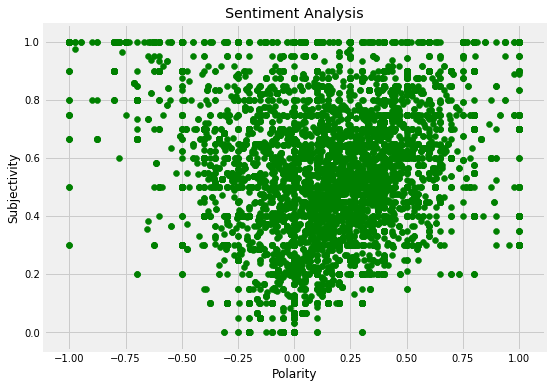

In [25]:
# Plotting 
plt.figure(figsize=(8,6)) 
for i in range(0, apc.shape[0]):
  plt.scatter(apc["Polarity"][i], apc["Subjectivity"][i], color='Green') 
# plt.scatter(x,y,color)   
plt.title('Sentiment Analysis') 
plt.xlabel('Polarity') 
plt.ylabel('Subjectivity') 
plt.show()

In [26]:
# Print the percentage of positive tweets
ptweets = apc[apc.sentiment == 'Positive']
ptweets = ptweets['tidy_tweet']
ptweets

round( (ptweets.shape[0] / apc.shape[0]) * 100 , 1)

26.4

In [27]:
# Print the percentage of negative tweets
ntweets = apc[apc.sentiment == 'Negative']
ntweets = ntweets['tidy_tweet']
ntweets

round( (ntweets.shape[0] / apc.shape[0]) * 100, 1)

9.0

In [28]:
# Print the percentage of neutral tweets
ntweets = apc[apc.sentiment == 'Neutral']
ntweets = ntweets['tidy_tweet']
ntweets

round( (ntweets.shape[0] / apc.shape[0]) * 100, 1)

64.6

In [29]:
# Show the value counts
apc['sentiment'].value_counts()

Neutral     26019
Positive    10621
Negative     3637
Name: sentiment, dtype: int64

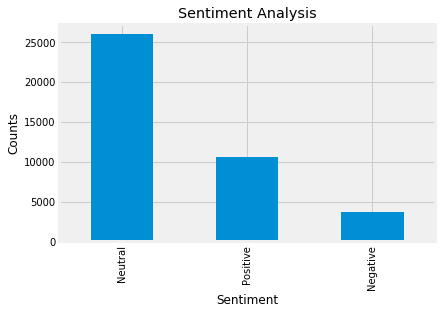

In [30]:
# Plotting and visualizing the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
apc['sentiment'].value_counts().plot(kind = 'bar')
plt.show()

### Word Frequencies

In [31]:
import nltk
from nltk.tokenize import word_tokenize
tweets = apc.tidy_tweet.str.cat(sep=' ')

In [32]:
#function to split text into word
tokens = word_tokenize(tweets)
vocabulary = set(tokens)
print(len(vocabulary))

frequency_dist = nltk.FreqDist(tokens)
sorted(frequency_dist,key=frequency_dist.__getitem__, reverse=True)[0:50]

30475


[':',
 'APC',
 ',',
 'PDP',
 '.',
 "''",
 '-',
 '...',
 '``',
 'Buhari',
 '!',
 'in',
 'the',
 'Presidential',
 'is',
 'PU',
 'to',
 ')',
 'of',
 '(',
 '?',
 'I',
 ';',
 'unit',
 'Nigeriadecides',
 'for',
 '1',
 'polling',
 'Unit',
 'and',
 "'s",
 'ward',
 'NigeriaDecides',
 '”',
 'Jonathan',
 '“',
 'Senate',
 'a',
 '%',
 'my',
 'at',
 'The',
 'Lagos',
 '&',
 'Ward',
 'In',
 '2',
 'Villa',
 'State',
 'are']

In [33]:
from sklearn.feature_extraction.text import CountVectorizer
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(1,1).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(apc['tidy_tweet'], 500)
#for word, freq in common_words:
    #print(word, freq)

In [34]:
df1 = pd.DataFrame(common_words, columns = ['word' , 'count'])
df1.head(10)

,word,count
0,apc,42200
1,pdp,30765
2,buhari,11325
3,in,10711
4,the,8912
5,presidential,7957
6,unit,7272
7,nigeriadecides,6394
8,is,6130
9,pu,6126


In [35]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(apc['tidy_tweet'], 300)
#for word, freq in common_words:
    #print(word, freq)

In [36]:
df2 = pd.DataFrame(common_words, columns = ['word' , 'count'])
df2.head(10)

,word,count
0,polling unit,4298
1,presidential apc,2867
2,senate apc,1939
3,presidential villa,1688
4,pres apc,1380
5,buhari is,1379
6,rep apc,1320
7,reps apc,1266
8,sen apc,1189
9,defeats pdp,1168


In [37]:
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_trigram(apc['tidy_tweet'], 200)
#for word, freq in common_words:
    #print(word, freq)

In [38]:
df3 = pd.DataFrame(common_words, columns = ['word' , 'count'])
df3.head(10)

,word,count
0,apc defeats pdp,1165
1,my polling unit,655
2,presidential villa apc,575
3,villa apc defeats,541
4,in rivers state,540
5,his polling unit,534
6,apc 334 pdp,499
7,apc members shot,480
8,shot dead in,475
9,334 pdp 241,464


In [39]:
tokenized_tweet = apc['tidy_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [Reps:, PDP, 108,, APC, 530,, labour, party, 1...
1    [Presidential, result, finally, done, with, in...
2                     [jist, me, about, APC, and, pdp]
3    [_, I, actually, didn't, vote, but, I, went, a...
4    [47i, The, PU, at, Layin, Kuka,, U/Dosa:, Pres...
Name: tidy_tweet, dtype: object

In [40]:
from nltk.stem.porter import *
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
tokenized_tweet.head()

0    [reps:, pdp, 108,, apc, 530,, labour, parti, 1...
1    [presidenti, result, final, done, with, in, my...
2                     [jist, me, about, apc, and, pdp]
3    [_, I, actual, didn't, vote, but, I, went, aro...
4    [47i, the, PU, at, layin, kuka,, u/dosa:, pres...
Name: tidy_tweet, dtype: object

In [41]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

apc['tidy_tweet'] = tokenized_tweet

In [42]:
apc['tidy_tweet'] = apc['tidy_tweet'].astype(str)

In [43]:
party_id_df = apc[['sentiment','party']].drop_duplicates().sort_values('sentiment')
category_to_id = dict(party_id_df.values)
id_to_category = dict(party_id_df[['party', 'sentiment']].values)
# Pick 5 random samples from the dataframe
apc.sample(5, random_state=0)

,original_text,party,tidy_tweet,Subjectivity,Polarity,sentiment,sent
32426,@9ja_Ninja I just feel u see d same tin am see...,APC,_ninja I just feel u see d same tin am seeing....,0.30625,-0.350,Negative,-1
5540,"Not 14999 or 15001 ""@alpinedna14: Challenge-Ib...",APC,"not 14999 or 15001 ""14: challenge-ibadan.presi...",0.00000,0.000,Neutral,0
27111,"BAUCHI,GRA, DAN'IYA HARDO, FIRE SERVICE Ma pol...",APC,"bauchi,gra, dan'iya hardo, fire servic Ma poll...",0.00000,0.000,Neutral,0
10769,Tragic: APC members murdered in Rivers State [...,APC,tragic: apc member murder in river state [grap...,0.57500,-0.375,Negative,-1
1691,"""@dino_melaye: Kabawa unit 2. Kogi west Senate...",APC,"""_melaye: kabawa unit 2. kogi west senat ap24 ...",0.00000,0.000,Neutral,0


In [44]:
# Group the dataframe by categories and count items 
apc.groupby('sentiment').party.count()

sentiment
Negative     3637
Neutral     26019
Positive    10621
Name: party, dtype: int64

In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [46]:
labels = apc.sentiment

In [47]:
labels.head()

0     Neutral
1     Neutral
2     Neutral
3    Positive
4     Neutral
Name: sentiment, dtype: object

In [48]:
text = apc['tidy_tweet']

In [49]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=8, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')

In [50]:
features = tfidf.fit_transform(text).toarray()

In [51]:
features.shape

(40277, 12289)

In [52]:
# Remember the dictionary created to map party to a number ? 
category_to_id.items()

dict_items([('Negative', 'APC'), ('Neutral', 'APC'), ('Positive', 'APC')])

In [53]:
# The sorted function Converts dictionary items into a (sorted) list. 
# In subsequent steps - We will use this list to iterate over the categories
sorted(category_to_id.items())

[('Negative', 'APC'), ('Neutral', 'APC'), ('Positive', 'APC')]

In [54]:
# Use chi-square analysis to find corelation between features (importantce of words) and labels(news category) 
from sklearn.feature_selection import chi2

N = 2  # We are going to look for top 3 categories

#For each category, find words that are highly corelated to it
for sentiment, party in sorted(category_to_id.items()):
  features_chi2 = chi2(features, labels == sentiment)                   # Do chi2 analyses of all items in this category
  indices = np.argsort(features_chi2[0])                                  # Sorts the indices of features_chi2[0] - the chi-squared stats of each feature
  feature_names = np.array(tfidf.get_feature_names())[indices]            # Converts indices to feature names ( in increasing order of chi-squared stat values)
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]         # List of single word features ( in increasing order of chi-squared stat values)
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]          # List for two-word features ( in increasing order of chi-squared stat values)
  print("# '{}':".format(sentiment))
  print("  . Most correlated unigrams:\n       . {}".format('\n       . '.join(unigrams[-N:]))) # Print 3 unigrams with highest Chi squared stat
  print("  . Most correlated bigrams:\n       . {}".format('\n       . '.join(bigrams[-N:]))) # Print 3 bigrams with highest Chi squared stat
  

# 'Negative':
  . Most correlated unigrams:
       . lose
       . georg
  . Most correlated bigrams:
       . georg lose
       . lose poll
# 'Neutral':
  . Most correlated unigrams:
       . lol
       . win
  . Most correlated bigrams:
       . buhari win
       . apc win
# 'Positive':
  . Most correlated unigrams:
       . lol
       . win
  . Most correlated bigrams:
       . buhari win
       . apc win


In [55]:
from sklearn.manifold import TSNE

# Sampling a subset of our dataset because t-SNE is computationally expensive
SAMPLE_SIZE = int(len(features) * 0.3)
np.random.seed(0)
indices = np.random.choice(range(len(features)), size=SAMPLE_SIZE, replace=False)          # Randomly select 30 % of samples
projected_features = TSNE(n_components=2, random_state=0).fit_transform(features[indices]) # Array of all projected features of 30% of Randomly chosen samples

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

from sklearn.model_selection import cross_val_score


models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]

In [57]:
CV = 5  # Cross Validate with 5 different folds of 20% data ( 80-20 split with 5 folds )

#Create a data frame that will store the results for all 5 trials of the 3 different models
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = [] # Initially all entries are empty

In [58]:
#For each Algorithm 
for model in models:
  model_name = model.__class__.__name__
  # create 5 models with different 20% test sets, and store their accuracies
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  # Append all 5 accuracies into the entries list ( after all 3 models are run, there will be 3x5 = 15 entries)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model

In [59]:
# Store the entries into the results dataframe and name its columns    
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

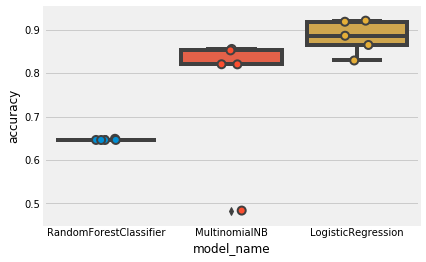

In [60]:
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)

In [61]:
cv_df.groupby('model_name').accuracy.mean()

model_name
LogisticRegression        0.883927
MultinomialNB             0.766438
RandomForestClassifier    0.646548
Name: accuracy, dtype: float64

In [62]:
cv_df

,model_name,fold_idx,accuracy
0,RandomForestClassifier,0,0.648709
1,RandomForestClassifier,1,0.645978
2,RandomForestClassifier,2,0.646058
3,RandomForestClassifier,3,0.646058
4,RandomForestClassifier,4,0.645934
5,MultinomialNB,0,0.855760
6,MultinomialNB,1,0.852408
7,MultinomialNB,2,0.820236
8,MultinomialNB,3,0.820484
9,MultinomialNB,4,0.483302


In [63]:
from sklearn.model_selection import train_test_split

model = LogisticRegression(random_state=0)

#Split Data 
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, apc.index, test_size=0.33, random_state=0)

#Train Algorithm
model.fit(X_train, y_train)

# Make Predictions
y_pred_proba = model.predict_proba(X_test)
y_pred = model.predict(X_test)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Text(0.5, 18.5, 'Predicted')

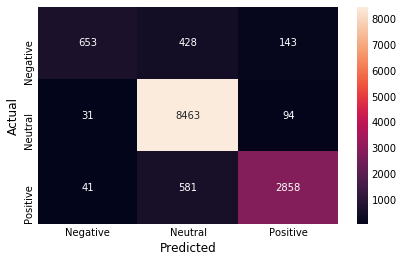

In [64]:
#Plot confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=party_id_df.sentiment.values, yticklabels=party_id_df.sentiment.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')


In [65]:
model.fit(features, labels)


/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)